In [1]:
import pandas as pd
import seaborn as sb
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("https://github.com/Lakshay-Gautam764/House-Price-Prediction/raw/main/Dataset.csv")

In [3]:
df.head()

,Location,Sq_Ft,Bedrooms,Bathrooms,Year_Built,Garage,Price
0,Gumanpura,2770,5,3,2014,Yes,3187524
1,Gumanpura,2726,3,1,2019,No,3106586
2,Dada bari,3058,5,2,2016,Yes,3798895
3,Keshav Pura,3416,2,3,2009,No,2893558
4,Nayapura,1581,2,3,2004,Yes,2792071


In [4]:
df.count()

,0
Location,5000
Sq_Ft,5000
Bedrooms,5000
Bathrooms,5000
Year_Built,5000
Garage,5000
Price,5000


In [5]:
df['Garage'] = df['Garage'].replace({'Yes': 1, 'No': 0})

<ipython-input-5-ced09de502d1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Garage'] = df['Garage'].replace({'Yes': 1, 'No': 0})


In [6]:
df.head()

,Location,Sq_Ft,Bedrooms,Bathrooms,Year_Built,Garage,Price
0,Gumanpura,2770,5,3,2014,1,3187524
1,Gumanpura,2726,3,1,2019,0,3106586
2,Dada bari,3058,5,2,2016,1,3798895
3,Keshav Pura,3416,2,3,2009,0,2893558
4,Nayapura,1581,2,3,2004,1,2792071


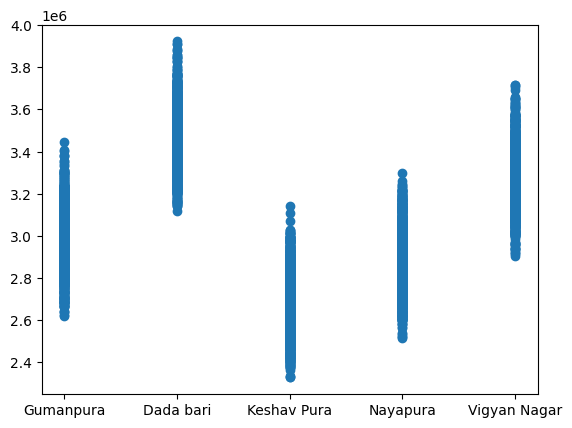

In [7]:
plt.scatter(x='Location', y='Price',data=df)

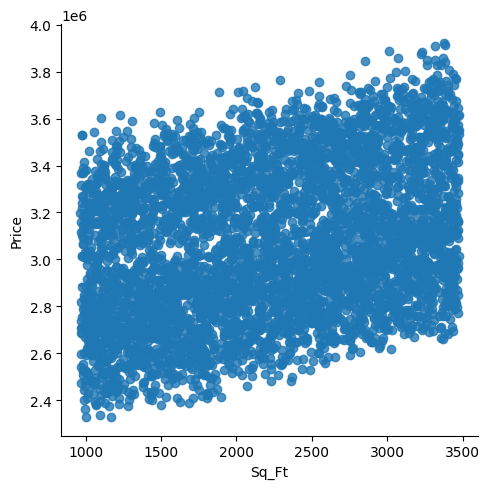

In [8]:
sb.lmplot(x='Sq_Ft',y='Price',data=df)

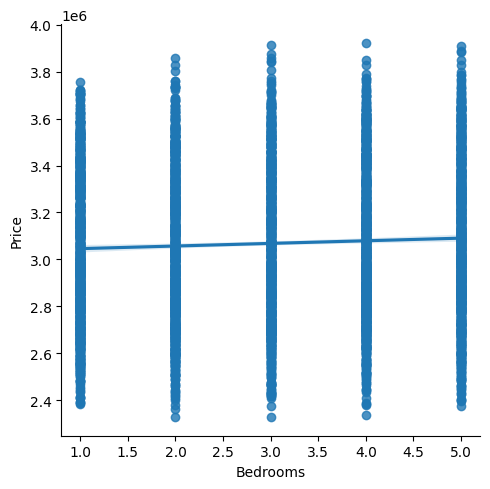

In [9]:
sb.lmplot(x='Bedrooms',y='Price',data=df)

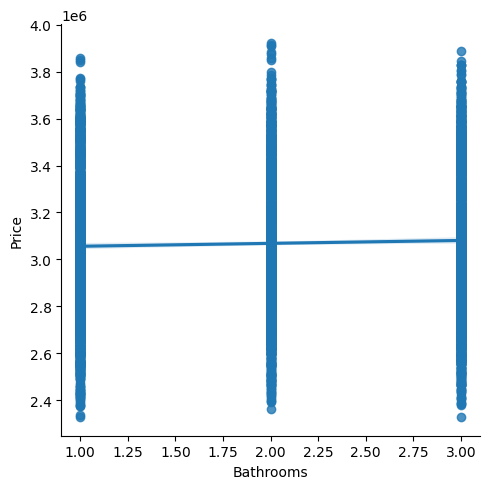

In [10]:
sb.lmplot(x='Bathrooms',y='Price',data=df)

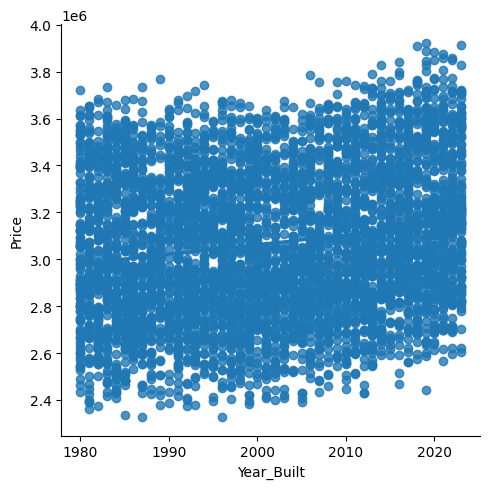

In [11]:
sb.lmplot(x='Year_Built',y='Price',data=df)

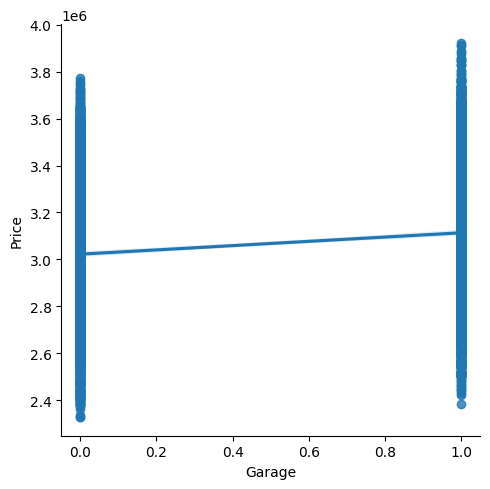

In [12]:
sb.lmplot(x='Garage',y='Price',data=df)

In [13]:
x=df[['Location', 'Sq_Ft', 'Bedrooms', 'Bathrooms', 'Year_Built', 'Garage']].values

In [14]:
x

array([['Gumanpura', 2770, 5, 3, 2014, 1],
       ['Gumanpura', 2726, 3, 1, 2019, 0],
       ['Dada bari', 3058, 5, 2, 2016, 1],
       ...,
       ['Gumanpura', 2611, 4, 3, 2002, 0],
       ['Gumanpura', 1589, 5, 2, 2023, 1],
       ['Nayapura', 2448, 3, 2, 1984, 1]], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder_x = LabelEncoder()

In [17]:
label_encoder_x.fit_transform(x[:,0])

array([1, 1, 0, ..., 1, 1, 3])

In [18]:
x[:,0]=label_encoder_x.fit_transform(x[:,0])

In [19]:
x

array([[1, 2770, 5, 3, 2014, 1],
       [1, 2726, 3, 1, 2019, 0],
       [0, 3058, 5, 2, 2016, 1],
       ...,
       [1, 2611, 4, 3, 2002, 0],
       [1, 1589, 5, 2, 2023, 1],
       [3, 2448, 3, 2, 1984, 1]], dtype=object)

In [20]:
y=df['Price'].values

In [21]:
y

array([3187524, 3106586, 3798895, ..., 2938168, 3162242, 2858776])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [24]:
x_train

array([[4, 2475, 2, 3, 2015, 1],
       [0, 1430, 5, 3, 1987, 1],
       [2, 1354, 2, 3, 1998, 1],
       ...,
       [2, 3268, 2, 2, 2018, 0],
       [1, 2245, 1, 1, 2018, 1],
       [4, 1056, 3, 3, 1996, 0]], dtype=object)

In [25]:
y_test

array([2813163, 2938123, 3288382, 3263896, 3321717, 3371753, 2573762,
       3295230, 2722551, 2866455, 2773694, 2782433, 3133467, 3532465,
       2952495, 3408901, 2540339, 2562470, 3282605, 3338920, 2841461,
       2691521, 3685838, 2945192, 2945935, 3196156, 2986827, 3246903,
       3096980, 3672568, 3560845, 3171400, 2851208, 3249655, 2931594,
       2856261, 3607919, 3288220, 3605592, 2483018, 2605213, 2777617,
       2498737, 3106967, 2711722, 2873068, 3047072, 3353127, 2901554,
       3153867, 2869089, 2675040, 2808784, 3051377, 3165500, 3136951,
       2861568, 3554812, 2915554, 3061290, 3180814, 3135825, 2899752,
       2575340, 3550110, 3144564, 3237259, 2507206, 3621651, 2679817,
       3285371, 3262047, 3287506, 3009048, 3077288, 2703066, 2702510,
       3056779, 2639162, 3221297, 2783852, 3433435, 2729405, 3396032,
       3243253, 3418911, 2806048, 2905110, 3422662, 2701275, 3474592,
       2732602, 3456209, 2415151, 2581955, 2863766, 2810907, 3506315,
       3399164, 2989

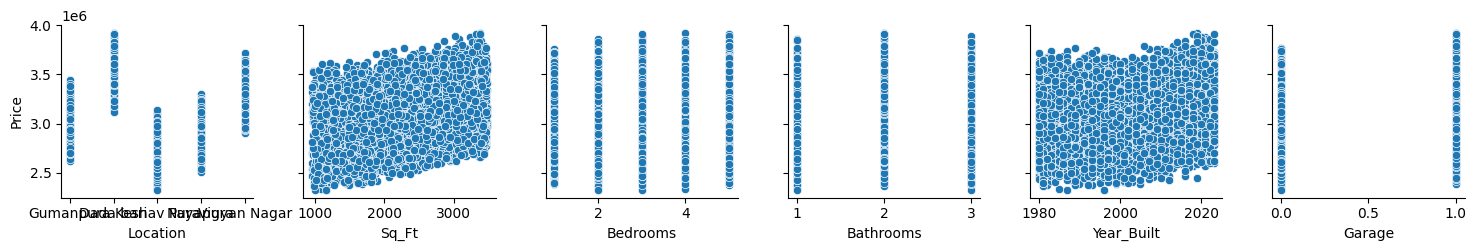

In [26]:
sb.pairplot(x_vars=['Location', 'Sq_Ft', 'Bedrooms', 'Bathrooms', 'Year_Built', 'Garage'],y_vars=['Price'],data=df)

In [27]:
reg=linear_model.LinearRegression()

In [28]:
reg.fit(x_train,y_train)

LinearRegression()

In [29]:
reg.predict(x_test)

array([2926043.20936808, 3003193.44409618, 3045418.30123764,
       2952075.52550268, 3039281.61299824, 3155141.58556312,
       2986642.97544291, 3108895.81819929, 3042549.5511081 ,
       3040975.79592784, 2996978.72781613, 3021622.24004874,
       2803244.35858242, 3273873.07346018, 3041755.07521225,
       3004705.40657363, 2921552.77869986, 2915741.53586105,
       3012555.58987728, 2942729.97895994, 3038896.8753983 ,
       3150327.21514972, 3311500.4904864 , 3031992.72230125,
       3062314.11841809, 3284551.68962217, 3109868.99556591,
       2949802.9064634 , 3309656.42467653, 3322728.29878501,
       3292347.73451652, 3231307.17994648, 3038278.59963104,
       3262174.07826065, 3165034.05994715, 2876447.40975422,
       3274302.54435205, 3358329.7458851 , 3166746.418444  ,
       2786862.00624826, 2778977.35630365, 3086970.34353013,
       2943730.71745283, 3201731.79543853, 3095768.27902068,
       3003409.63482546, 3087716.89062423, 3136192.84079257,
       3012204.82941347,

In [30]:
df

,Location,Sq_Ft,Bedrooms,Bathrooms,Year_Built,Garage,Price
0,Gumanpura,2770,5,3,2014,1,3187524
1,Gumanpura,2726,3,1,2019,0,3106586
2,Dada bari,3058,5,2,2016,1,3798895
3,Keshav Pura,3416,2,3,2009,0,2893558
4,Nayapura,1581,2,3,2004,1,2792071
...,...,...,...,...,...,...,...
4995,Gumanpura,1974,3,3,2005,1,3050494
4996,Keshav Pura,1783,3,3,1990,0,2614841
4997,Gumanpura,2611,4,3,2002,0,2938168
4998,Gumanpura,1589,5,2,2023,1,3162242


In [31]:
reg.predict([[2, 1000, 1, 1, 2010, 0]])

array([2854893.34320129])

In [32]:
reg.predict([[2, 1500, 1, 1, 2010, 0]])

array([2924436.84220425])

In [33]:
reg.predict([[2, 2000, 3, 3, 2010, 1]])

array([3130067.93665503])